# Santander Customer Satisfaction

This Kaggle competition is about predicting customer satisfaction from a data set provided by Santander bank. Let's take a look!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
data.tail()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0
76019,151838,2,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
data.shape

(76020, 371)

We have 371 fetaures, the first one being an ID to identify the observation and the last one, 'TARGET', is the one we want to predict: 1 for unsatisfied customer and 0 for a satisfied customer. Curiously enough, some feature names appear to be in spanish. For example, "saldo\_medio ..." can be translated to "mean\_balance\_..." so we can have some intuition about the meaning of the features.

In [6]:
# There is an unique ID per observation. We might as well drop ID.
len(data.ID.unique())

76020

In [7]:
data.drop('ID', axis=1, inplace=True)

In [8]:
data.columns

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=370)

As expected, the names of the features are in Spanish and contain information about balance, reimbursements, purchases, etc.

In [9]:
data.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


We can see some strange things, a lot of the variables have 0's in their percinteles. Let's take a closer look.

In [10]:
temp = data.imp_ent_var16_ult1[data.imp_ent_var16_ult1 != 0]
len(temp)

3719

It seems that it is a feature that not many observations have. Taking a guess here, imp\_ent\_.. could be "importe de entrada...", an initial deposit for some sort financial product offered by Santander that not that many people have.

An option that is worthwile exploring is to use these features as indicators of the client having that product. Maybe something like:
0 doesn't have the prodcut, 1 has product with small initial deposit, 2 same but with higher deposit, 3 etc.

Question: What proportion of observations have non-zero value?

Answer: It turns out that only about 5% of the observations.

In [11]:
n_obs, n_features = data.shape

In [12]:
len(temp)/n_obs

0.04892133649039727

Let's do the same for the rest of the features.

In [13]:
def non_zero_proportion(column):
    return len(data[column][data[column] != 0])/data.shape[0]

In [14]:
non_zero = pd.DataFrame(columns = ['feature', 'pct'])

In [15]:
for name in data.columns:
    non_zero = non_zero.append({"feature": name, "pct": non_zero_proportion(name)*100}, ignore_index=True)

In [16]:
non_zero
# Note that the value of pct ranges from 0% to 100%.

,feature,pct
0,var3,99.901342
1,var15,100.000000
2,imp_ent_var16_ult1,4.892134
3,imp_op_var39_comer_ult1,13.082084
4,imp_op_var39_comer_ult3,15.377532
5,imp_op_var40_comer_ult1,0.388056
6,imp_op_var40_comer_ult3,0.457774
7,imp_op_var40_efect_ult1,0.049987
8,imp_op_var40_efect_ult3,0.059195
9,imp_op_var40_ult1,0.301237


In [17]:
non_zero.describe()

,pct
count,370.000000
mean,9.084508
std,22.377080
min,0.000000
25%,0.006906
50%,0.313733
75%,4.546172
max,100.000000


A mean of 9.08 indicates that most entries in the data set are 0's. In fact, a few of the variables only contain zeros! We should drop them.

In [18]:
deleted = []
for name in data.columns:
    if sum(data[name]) == 0:
        data.drop(name, axis = 1, inplace=True)
        deleted.append(name)

In [19]:
data.shape

(76020, 336)

We have eliminated 34 features this way. We should also update the non_zero data frame.

In [20]:
non_zero = non_zero[non_zero.pct != 0]

In [21]:
non_zero.describe()

,pct
count,336.000000
mean,10.003774
std,23.287998
min,0.001315
25%,0.039463
50%,0.405814
75%,5.085504
max,100.000000


In [22]:
data.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


Some of the variables have a log normal distribution.

'var38' and to a lesser extend, 'saldo\_\*' variables

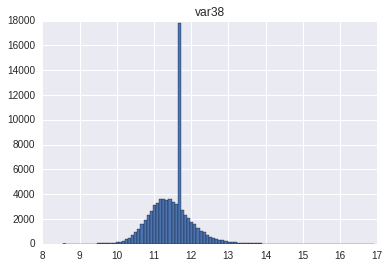

In [23]:
plt.hist(data['var38'].apply(np.log),bins=100)
plt.title('var38')
plt.show()

In [24]:
# we take care of that nasty -999,999 value in var2
for i in data.index:
        if data.ix[i,'var3'] == 2:
            data.set_value(i,'var3', 0)
        else:
            data.set_value(i,'var3', 1)

# 'Saldo' features analysis 
## We look at the distribution of saldo features ignoring 0's

In [25]:
#In the course of this analysis we found that 'saldo_var13_medio' is not properly formatted. 
#We include this on "process_data" to change it into 'saldo_mediio_var13' for consistency.
data.rename(columns={'saldo_var13_medio': 'saldo_medio_var13'}, inplace=True)

In [26]:
saldo_features = [name for name in data.columns if 'saldo' in name]

In [28]:
data_saldo = data[saldo_features]

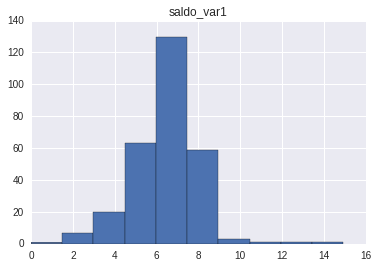

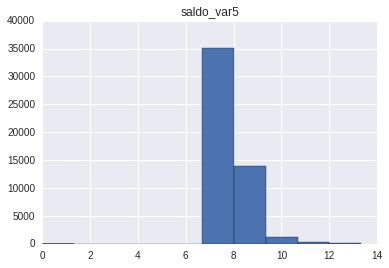

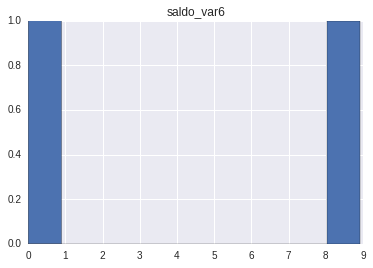

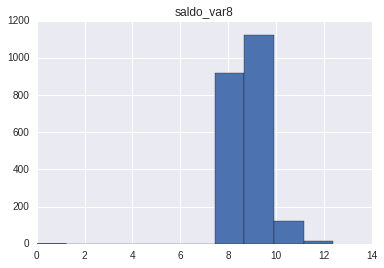

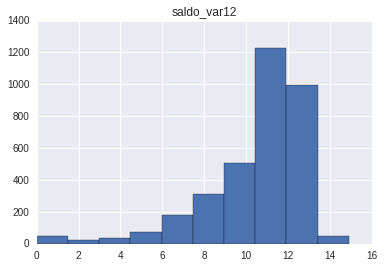

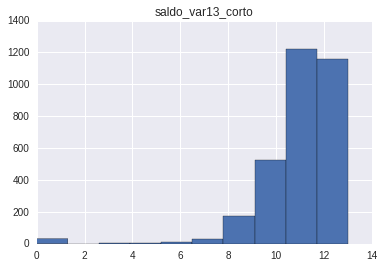

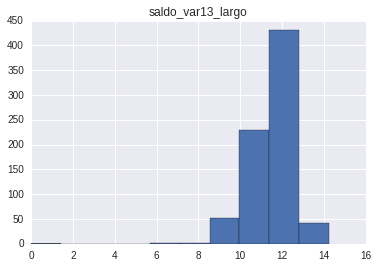

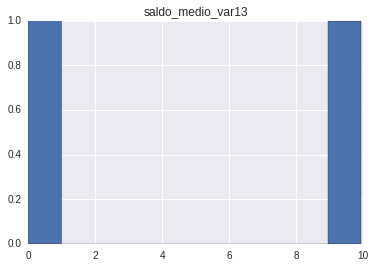

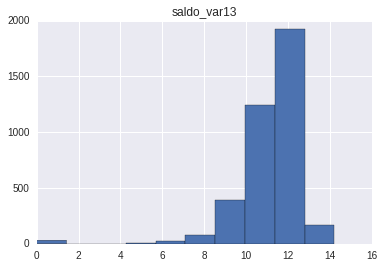

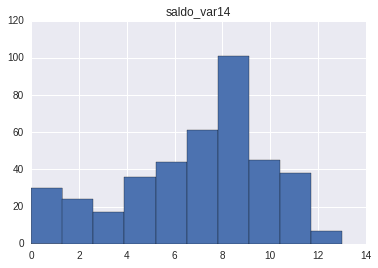

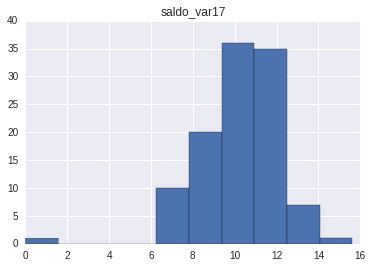

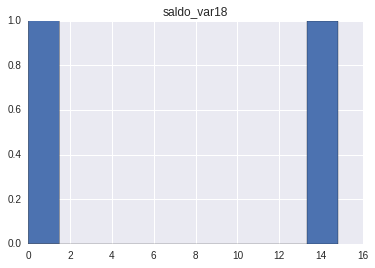

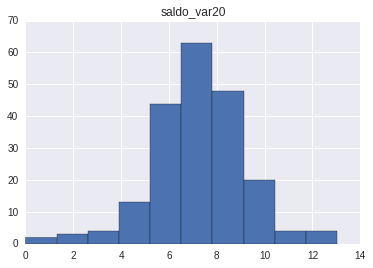

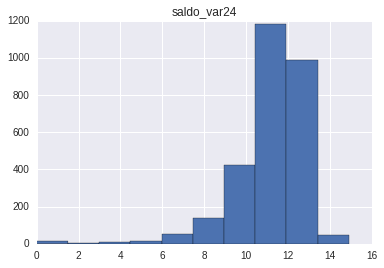

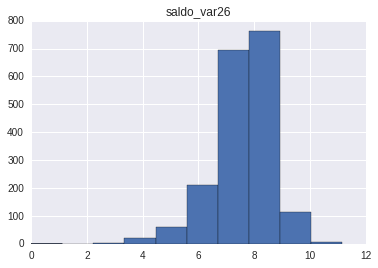

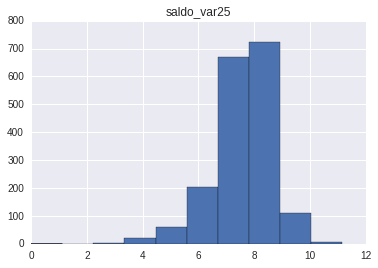

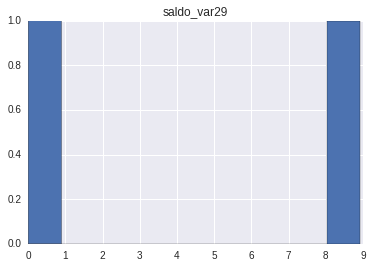

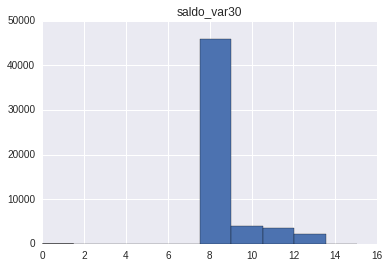

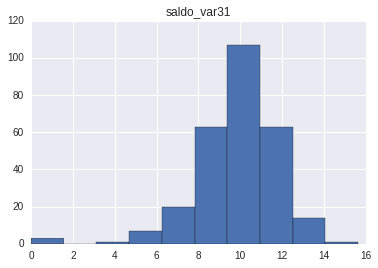

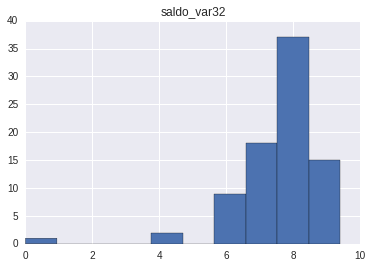

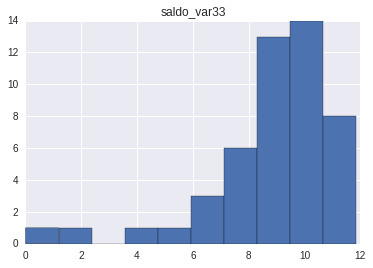

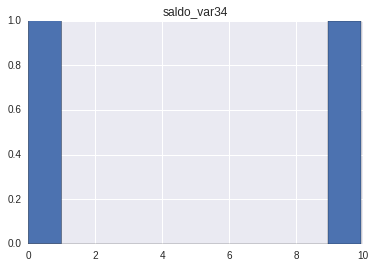

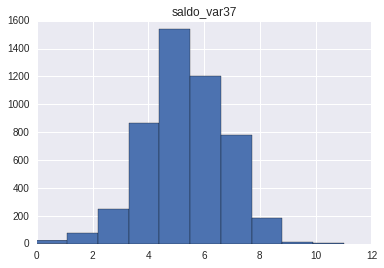

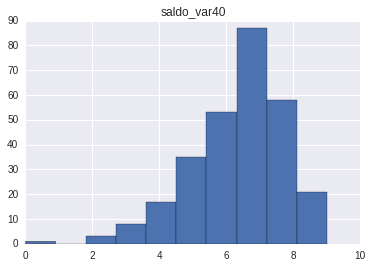

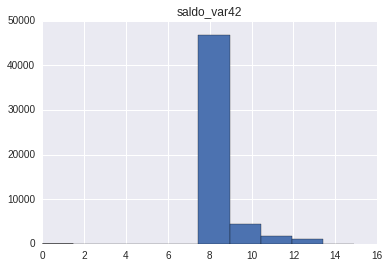

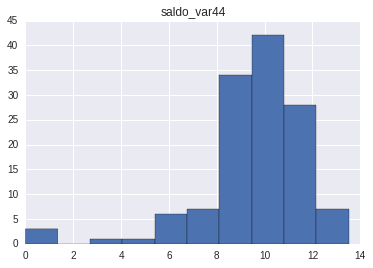

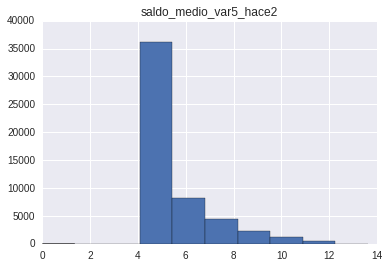

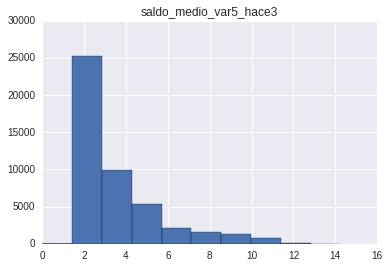

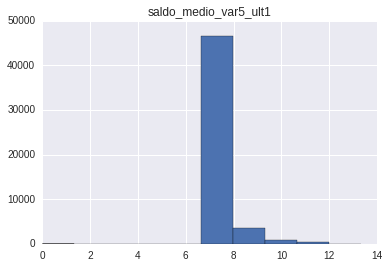

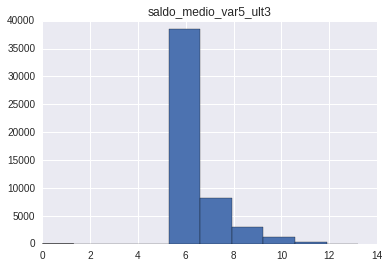

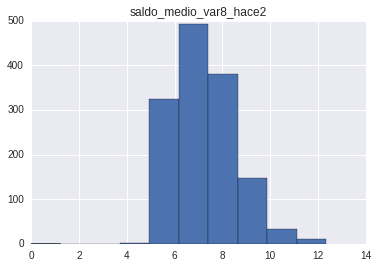

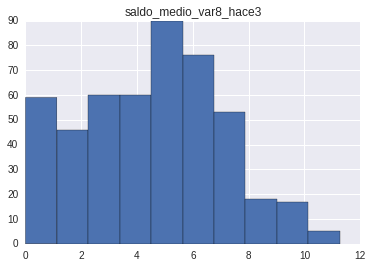

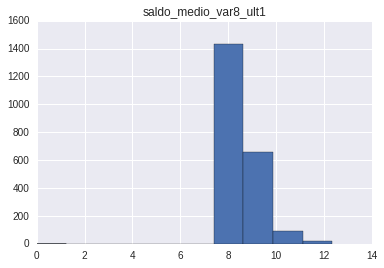

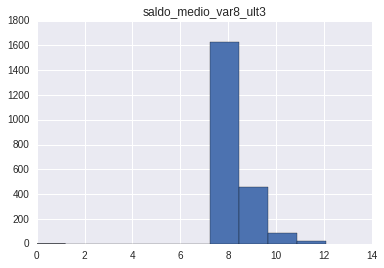

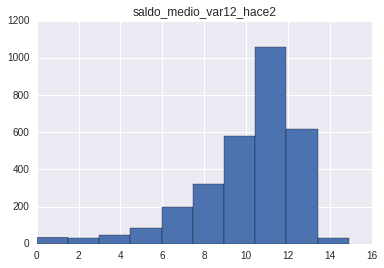

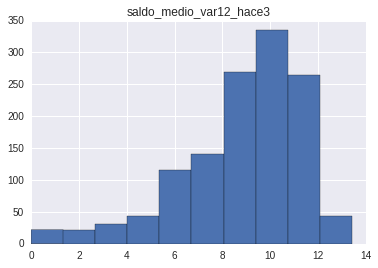

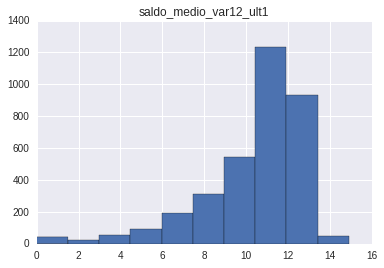

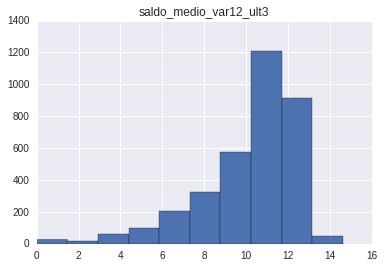

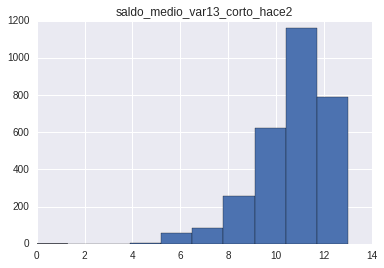

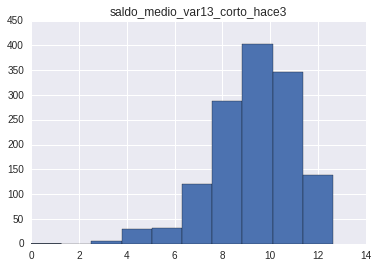

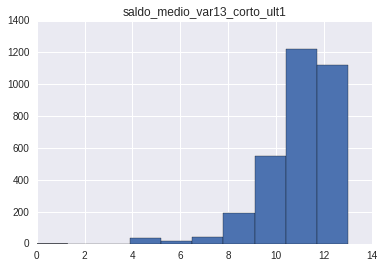

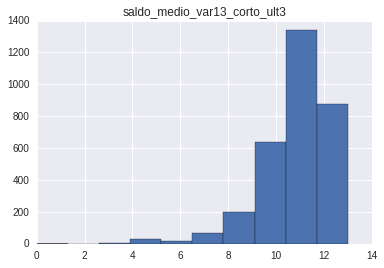

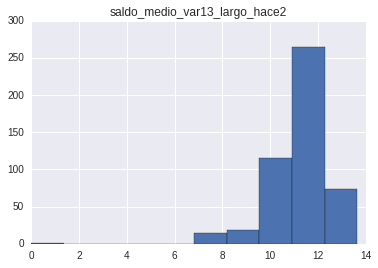

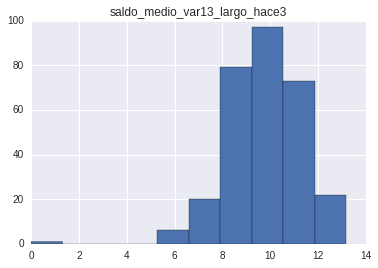

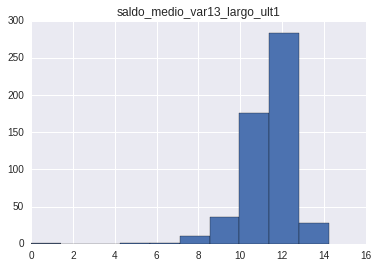

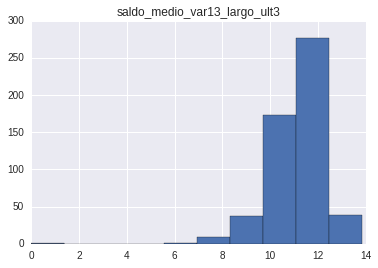

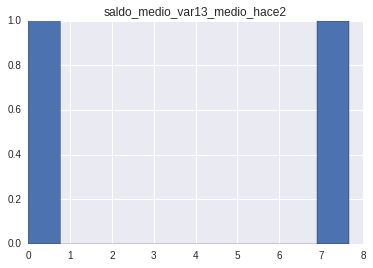

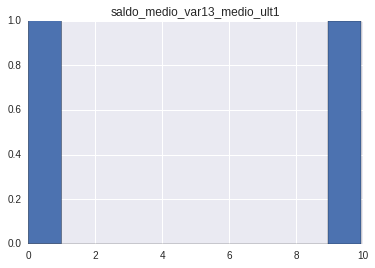

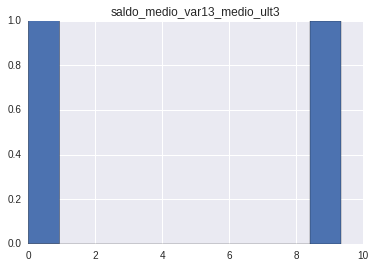

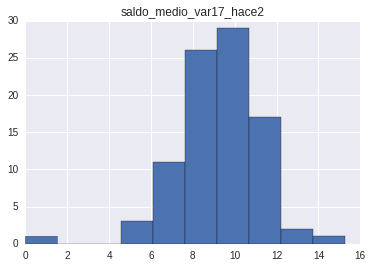

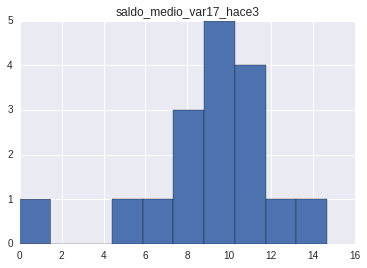

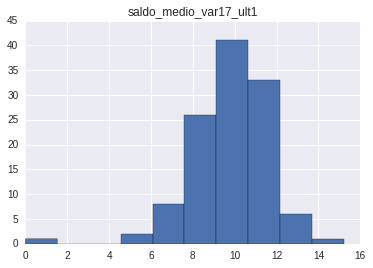

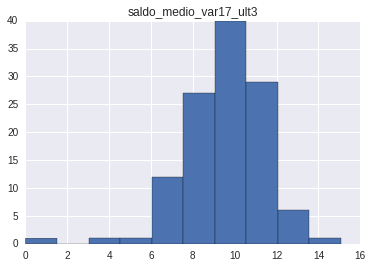

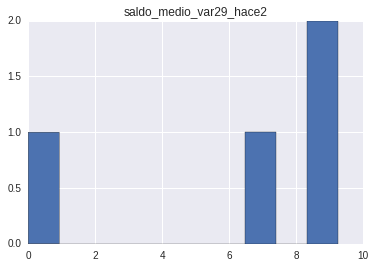

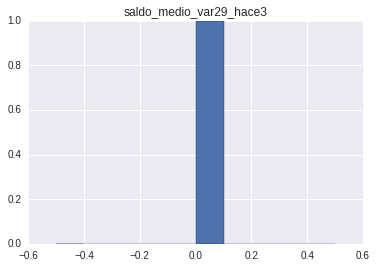

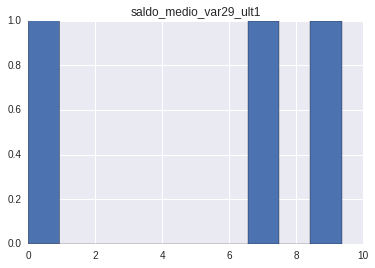

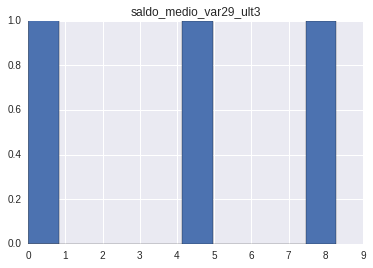

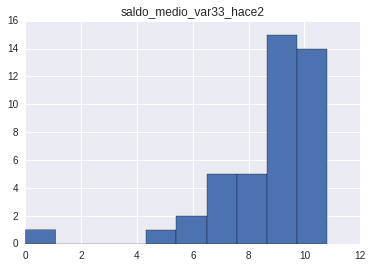

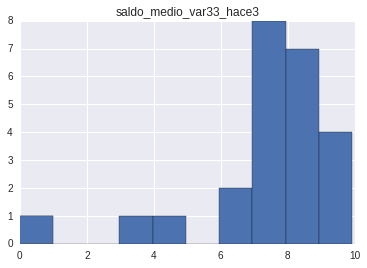

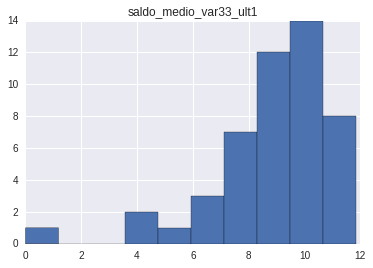

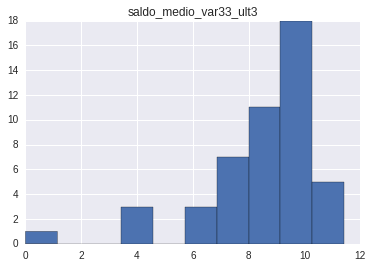

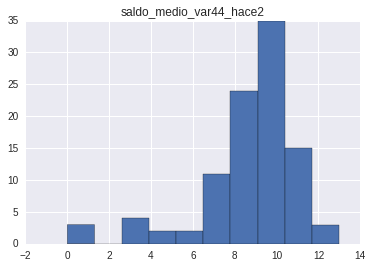

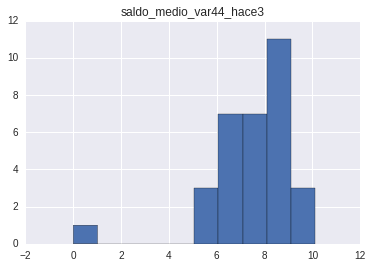

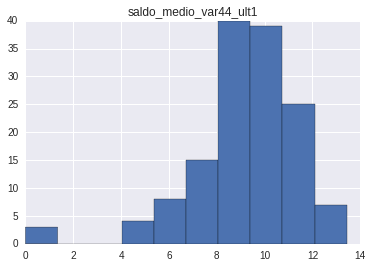

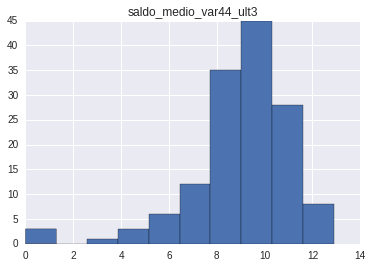

In [29]:

for name in data_saldo.columns:
    # ignore 0 values
    temp = data_saldo[name][data_saldo[name] != 0].reset_index(drop=True)
    temp = temp
    # bring values to the positive 
    temp = temp + 1 - temp.min()
    # apply log
    temp = temp.apply(np.log)
    # plot hist    
    plt.hist(temp)
    plt.title(name)
    plt.show()
    #print("Can't plot feature {}".format(name))

In [30]:
camel = ['saldo_var6', 'saldo_medio_var13', 'saldo_var18', 
 'saldo_var29', 'saldo_var34', 'saldo_medio_var29_ult3']
spike = ['saldo_var30', 'saldo_var42', 'saldo_medio_var5_hace2',
         'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1']

In [31]:
for name in camel:
    print(data[name].groupby(data['TARGET']).value_counts())

TARGET  saldo_var6
0       0.0           73010
        11976.6           1
        19531.8           1
1       0.0            3008
Name: saldo_var6, dtype: int64
TARGET  saldo_medio_var13
0       0                    73010
        9000                     1
        30000                    1
1       0                     3008
Name: saldo_medio_var13, dtype: int64
TARGET  saldo_var18
0       0              73010
        300000             1
        3000000            1
1       0               3008
Name: saldo_var18, dtype: int64
TARGET  saldo_var29
0       0.0            73010
        11976.6            1
        19531.8            1
1       0.0             3008
Name: saldo_var29, dtype: int64
TARGET  saldo_var34
0       0              73010
        15000              1
        36000              1
1       0               3008
Name: saldo_var34, dtype: int64
TARGET  saldo_medio_var29_ult3
0       0.00                      73009
        3365.46                       1
        3490.80    

In [32]:
for name in spike:
    print(data[name].groupby(data['TARGET']).value_counts())

TARGET  saldo_var30
0       0.00           18524
        3.00           17970
        90.00           5197
        30.00           1564
        15.00           1438
        6.00             904
        150.00           810
        60.00            667
        300.00           395
        120.00           300
        93.00            193
        600.00           148
        9.00             147
        900.00           137
        450.00           113
        153.00           104
        45.00             96
        180.00            94
        3000.00           90
        1500.00           89
        12.00             81
        90000.00          71
        1.50              70
        150000.00         65
        300000.00         65
        0.30              64
        303.00            64
        60000.00          61
        30000.00          58
        750.00            55
                       ...  
1       57684.15           1
        60098.49           1
        60792.66       

## Creating saldo features

We are going to create a few saldo features:
- mean\_saldo: average of all features of the type 'saldo_var{\d}'.
- mean\_saldo_medio: average of all features of the type 'saldo\_medio_var{\d}'.
- mean\_saldo\_medio\_{ult{\d}, hace{\d}}: Similar to above

In [33]:
for name in saldo_features:
    if 'hace' in name or 'ult' in name:
        print(name)

saldo_medio_var5_hace2
saldo_medio_var5_hace3
saldo_medio_var5_ult1
saldo_medio_var5_ult3
saldo_medio_var8_hace2
saldo_medio_var8_hace3
saldo_medio_var8_ult1
saldo_medio_var8_ult3
saldo_medio_var12_hace2
saldo_medio_var12_hace3
saldo_medio_var12_ult1
saldo_medio_var12_ult3
saldo_medio_var13_corto_hace2
saldo_medio_var13_corto_hace3
saldo_medio_var13_corto_ult1
saldo_medio_var13_corto_ult3
saldo_medio_var13_largo_hace2
saldo_medio_var13_largo_hace3
saldo_medio_var13_largo_ult1
saldo_medio_var13_largo_ult3
saldo_medio_var13_medio_hace2
saldo_medio_var13_medio_ult1
saldo_medio_var13_medio_ult3
saldo_medio_var17_hace2
saldo_medio_var17_hace3
saldo_medio_var17_ult1
saldo_medio_var17_ult3
saldo_medio_var29_hace2
saldo_medio_var29_hace3
saldo_medio_var29_ult1
saldo_medio_var29_ult3
saldo_medio_var33_hace2
saldo_medio_var33_hace3
saldo_medio_var33_ult1
saldo_medio_var33_ult3
saldo_medio_var44_hace2
saldo_medio_var44_hace3
saldo_medio_var44_ult1
saldo_medio_var44_ult3


As we can see, all the features containing 'hace' or 'ult' are of the 'medio' variety.

In [34]:
# features for 'saldo_medio'
mean_saldo_features = []
for name in saldo_features:
    if 'medio' not in name:
        print(name)
        mean_saldo_features.append(name)

saldo_var1
saldo_var5
saldo_var6
saldo_var8
saldo_var12
saldo_var13_corto
saldo_var13_largo
saldo_var13
saldo_var14
saldo_var17
saldo_var18
saldo_var20
saldo_var24
saldo_var26
saldo_var25
saldo_var29
saldo_var30
saldo_var31
saldo_var32
saldo_var33
saldo_var34
saldo_var37
saldo_var40
saldo_var42
saldo_var44


In [35]:
len(mean_saldo_features)

25

In [36]:
temp = data[mean_saldo_features]
temp = np.nanmean(temp, axis=1)
data.insert(0, 'mean_saldo', temp)  

In [37]:
data.head()

,mean_saldo,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,0.0000,0,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,36.0000,0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,0.3600,0,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,9.8724,0,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,21600.4800,0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [38]:
mean_saldo_medio_features = []
for name in saldo_features:
    if 'medio' in name:
        if 'hace' not in name and 'ult' not in name:
            print(name)

saldo_medio_var13


In [39]:
data['saldo_medio_var13'].groupby(data['TARGET']).value_counts()

TARGET  saldo_medio_var13
0       0                    73010
        9000                     1
        30000                    1
1       0                     3008
Name: saldo_medio_var13, dtype: int64

We can probably ignore this feature.

In [40]:
mean_saldo_medio_hace1_features =[]
for name in saldo_features:
    if 'hace1' in name:
            print(name)

No 'hace1' features

In [41]:
mean_saldo_medio_hace2_features =[]
for name in saldo_features:
    if 'hace2' in name:
            print(name)
            mean_saldo_medio_hace2_features.append(name)

saldo_medio_var5_hace2
saldo_medio_var8_hace2
saldo_medio_var12_hace2
saldo_medio_var13_corto_hace2
saldo_medio_var13_largo_hace2
saldo_medio_var13_medio_hace2
saldo_medio_var17_hace2
saldo_medio_var29_hace2
saldo_medio_var33_hace2
saldo_medio_var44_hace2


In [42]:
temp = data[mean_saldo_medio_hace2_features]
temp = np.nanmean(temp, axis=1)
data.insert(0, 'mean_saldo_medio_hace2', temp)  

In [43]:
data.head()

,mean_saldo_medio_hace2,mean_saldo,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,0.000,0.0000,0,23,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,30.000,36.0000,0,34,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,0.300,0.3600,0,23,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,18.609,9.8724,0,37,0.0,195.0,195.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,0.300,21600.4800,0,39,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [44]:
mean_saldo_medio_hace3_features =[]
for name in saldo_features:
    if 'hace3' in name:
            print(name)
            mean_saldo_medio_hace3_features.append(name)

saldo_medio_var5_hace3
saldo_medio_var8_hace3
saldo_medio_var12_hace3
saldo_medio_var13_corto_hace3
saldo_medio_var13_largo_hace3
saldo_medio_var17_hace3
saldo_medio_var29_hace3
saldo_medio_var33_hace3
saldo_medio_var44_hace3


In [45]:
temp = data[mean_saldo_medio_hace3_features]
temp = np.nanmean(temp, axis=1)
data.insert(0, 'mean_saldo_medio_hace3', temp)

In [46]:
data.head()

,mean_saldo_medio_hace3,mean_saldo_medio_hace2,mean_saldo,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,0.000000,0.000,0.0000,0,23,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,23.456667,30.000,36.0000,0,34,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,0.020000,0.300,0.3600,0,23,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,0.000000,18.609,9.8724,0,37,0.0,195.0,195.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,0.033333,0.300,21600.4800,0,39,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [47]:
mean_saldo_medio_ult1_features =[]
for name in saldo_features:
    if 'ult1' in name:
            print(name)
            mean_saldo_medio_ult1_features.append(name)

saldo_medio_var5_ult1
saldo_medio_var8_ult1
saldo_medio_var12_ult1
saldo_medio_var13_corto_ult1
saldo_medio_var13_largo_ult1
saldo_medio_var13_medio_ult1
saldo_medio_var17_ult1
saldo_medio_var29_ult1
saldo_medio_var33_ult1
saldo_medio_var44_ult1


In [48]:
temp = data[mean_saldo_medio_ult1_features]
temp = np.nanmean(temp, axis=1)
data.insert(0, 'mean_saldo_medio_ult1', temp)

In [49]:
mean_saldo_medio_ult2_features =[]
for name in saldo_features:
    if 'ult2' in name:
            print(name)
            mean_saldo_medio_ult2_features.append(name)

No 'ult2' features

In [50]:
mean_saldo_medio_ult3_features =[]
for name in saldo_features:
    if 'ult3' in name:
            print(name)
            mean_saldo_medio_ult3_features.append(name)

saldo_medio_var5_ult3
saldo_medio_var8_ult3
saldo_medio_var12_ult3
saldo_medio_var13_corto_ult3
saldo_medio_var13_largo_ult3
saldo_medio_var13_medio_ult3
saldo_medio_var17_ult3
saldo_medio_var29_ult3
saldo_medio_var33_ult3
saldo_medio_var44_ult3


In [51]:
temp = data[mean_saldo_medio_ult3_features]
temp = np.nanmean(temp, axis=1)
data.insert(0, 'mean_saldo_medio_ult3', temp)

In [52]:
# drop the saldo features now
data.drop(saldo_features, axis = 1, inplace = True)

In [53]:
new_features = ['mean_saldo', 'mean_saldo_medio_hace2', 'mean_saldo_medio_hace3', 
                'mean_saldo_medio_ult1', 'mean_saldo_medio_ult3']

In [54]:
data[new_features].head()

,mean_saldo,mean_saldo_medio_hace2,mean_saldo_medio_hace3,mean_saldo_medio_ult1,mean_saldo_medio_ult3
0,0.0000,0.000,0.000000,0.000,0.000
1,36.0000,30.000,23.456667,30.000,24.075
2,0.3600,0.300,0.020000,0.300,0.207
3,9.8724,18.609,0.000000,9.156,13.884
4,21600.4800,0.300,0.033333,12600.297,9900.336


In [55]:
data[new_features].describe()

,mean_saldo,mean_saldo_medio_hace2,mean_saldo_medio_hace3,mean_saldo_medio_ult1,mean_saldo_medio_ult3
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000
mean,1917.243557,1018.608283,252.494336,1293.413815,1034.383645
std,9397.918869,5403.666082,2475.431336,6251.549578,5085.250025
min,-289.728000,-28.767000,-0.893333,-340.134000,-184.452000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.360000,0.300000,0.116667,0.300000,0.300000
75%,36.000000,15.000000,1.786667,27.396750,20.853750
max,570232.315200,421009.236000,434544.256667,400018.857000,404039.307000


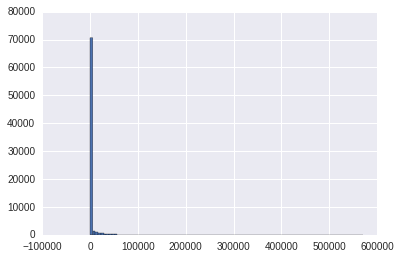

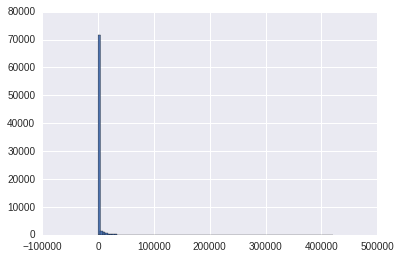

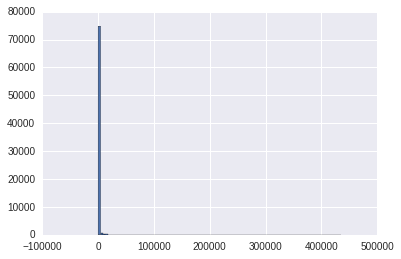

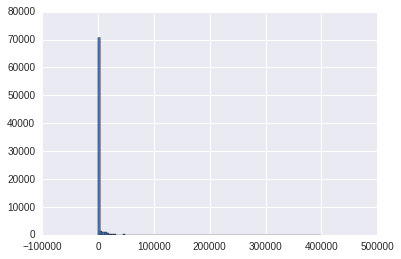

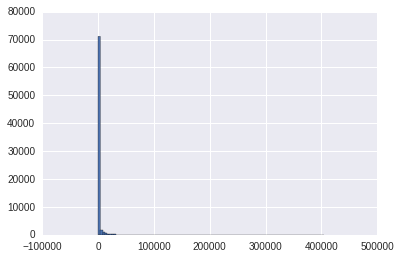

In [56]:
for name in new_features:
    plt.hist(data[name], bins=100)
    plt.show()

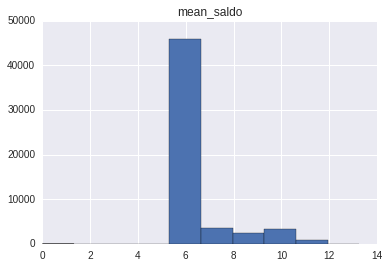

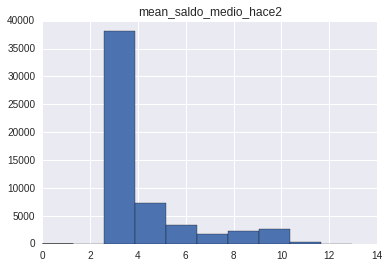

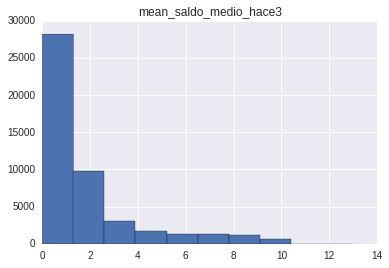

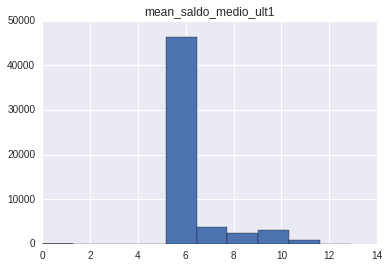

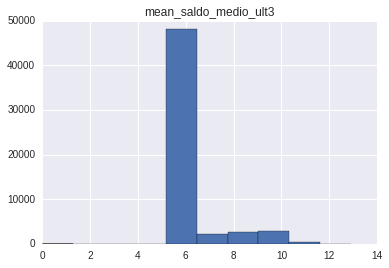

In [57]:
# Ploting ignoring 0's (which are basically NaN's)
for name in new_features:
    # ignore 0 values
    temp = data[name][data[name] != 0].reset_index(drop=True)
    temp = temp
    # bring values to the positive 
    temp = temp + 1 + abs(temp.min())
    # apply log
    temp = temp.apply(np.log)
    # plot hist    
    plt.hist(temp)
    plt.title(name)
    plt.show()
    #print("Can't plot feature {}".format(name))

Looks like a good idea to log-transfor these new features. 

In [58]:
# Optional: log-transform new features
for name in new_features:
    # ignore 0 values
    temp = data[name][data[name] != 0]
    temp = temp
    # bring values to the positive 
    temp = temp + 1 - temp.min()
    # apply log
    temp = temp.apply(np.log)
    data[name] = temp

In [59]:
data.fillna(0, inplace=True)

In [60]:
data.head()

,mean_saldo_medio_ult3,mean_saldo_medio_ult1,mean_saldo_medio_hace3,mean_saldo_medio_hace2,mean_saldo,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,...,num_trasp_var33_in_ult1,num_trasp_var33_out_ult1,num_venta_var44_hace3,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,var38,TARGET
0,0.000000,0.000000,0.000000,0.000000,0.000000,0,23,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,39205.170000,0
1,5.344853,5.916563,3.232779,4.090454,5.789128,0,34,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,49278.030000,0
2,5.223912,5.833154,0.648847,3.403428,5.673626,0,23,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,67333.770000,0
3,5.294992,5.858761,0.000000,3.879004,5.705782,0,37,0.0,195.0,195.0,...,0,0,0,0,27,3,18,48,64007.970000,0
4,9.218883,9.468189,0.655791,3.403428,9.993840,0,39,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,117310.979016,0


In [61]:
data.describe()

,mean_saldo_medio_ult3,mean_saldo_medio_ult1,mean_saldo_medio_hace3,mean_saldo_medio_hace2,mean_saldo,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,...,num_trasp_var33_in_ult1,num_trasp_var33_out_ult1,num_venta_var44_hace3,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,4.290217,4.689176,1.204974,3.226843,4.635093,0.024401,33.212865,86.208265,72.363067,119.529632,...,0.000237,0.000039,0.000158,0.004420,5.393212,3.894396,4.363496,13.651105,1.172358e+05,0.039569
std,2.759406,2.945461,1.869355,2.477431,2.995469,0.154293,12.956486,1614.757313,339.315831,546.266294,...,0.030775,0.010881,0.026652,0.264256,14.496095,10.416821,14.406485,33.304012,1.826646e+05,0.194945
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,5.224412,5.833154,0.698135,3.403428,5.673626,0.000000,28.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,5.329359,5.909524,1.302913,3.801471,5.789128,0.000000,40.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,12.000000,1.187563e+05,0.000000
max,12.909726,12.900119,12.982057,12.950481,13.254309,1.000000,105.000000,210000.000000,12888.030000,21024.810000,...,6.000000,3.000000,6.000000,39.000000,342.000000,339.000000,510.000000,801.000000,2.203474e+07,1.000000


In [62]:
data.to_csv('data/train_exteded_saldo.csv', index=False)

# Happy vs. Unhappy

Since there are comparatively small number of unhappy customers, it makes sense to try to find patterns in the dataset of unsatisfied customers.

In [74]:
unhappy = data[data.TARGET == 1]
happy = data[data.TARGET == 0]

In [75]:
unhappy = unhappy.drop('TARGET', axis=1)
happy = happy.drop('TARGET', axis=1)

We want to learn about the difference between happy and unhappy.

In [76]:
unhappy.describe()

,mean_saldo_medio_ult3,mean_saldo_medio_ult1,mean_saldo_medio_hace3,mean_saldo_medio_hace2,mean_saldo,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,...,num_trasp_var33_in_ult1,num_trasp_var33_out_ult1,num_venta_var44_hace3,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,var38,test
count,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,...,3008.0,3008.0,3008.0,3008.0,3008.000000,3008.000000,3008.000000,3008.000000,3.008000e+03,3008.000000
mean,2.288571,2.522210,0.477616,1.628783,2.459263,0.018949,39.680519,86.069362,89.670439,128.994674,...,0.0,0.0,0.0,0.0,5.322806,3.580452,4.931848,13.835106,9.967828e+04,2.288571
std,2.756554,3.021276,1.037882,2.089379,2.993372,0.136369,12.020518,1390.948493,467.849987,578.275407,...,0.0,0.0,0.0,0.0,17.013518,11.912056,17.574763,38.333285,1.063098e+05,2.756554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.113663e+04,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,5.716094e+04,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,8.621997e+04,0.000000
75%,5.231482,5.836663,0.694812,3.437754,5.677329,0.000000,47.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,3.000000,3.000000,0.000000,9.000000,1.173110e+05,5.231482
max,10.692303,11.006399,9.861027,11.103290,11.306153,1.000000,102.000000,51003.000000,12888.030000,13183.230000,...,0.0,0.0,0.0,0.0,342.000000,330.000000,306.000000,642.000000,3.988595e+06,10.692303


In [77]:
happy.describe()

,mean_saldo_medio_ult3,mean_saldo_medio_ult1,mean_saldo_medio_hace3,mean_saldo_medio_hace2,mean_saldo,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,...,num_trasp_var33_in_ult1,num_trasp_var33_out_ult1,num_venta_var44_hace3,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,var38,test
count,73012.000000,73012.000000,73012.000000,73012.000000,73012.000000,73012.000000,73012.000000,73012.000000,73012.000000,73012.000000,...,73012.000000,73012.000000,73012.000000,73012.000000,73012.000000,73012.000000,73012.000000,73012.000000,7.301200e+04,73012.000000
mean,4.372682,4.778452,1.234940,3.292681,4.724734,0.024626,32.946406,86.213988,71.650026,119.139685,...,0.000247,0.000041,0.000164,0.004602,5.396113,3.907330,4.340081,13.643524,1.179592e+05,4.372682
std,2.728224,2.907886,1.889814,2.470058,2.961485,0.154984,12.924444,1623.324542,332.942974,544.907891,...,0.031402,0.011103,0.027195,0.269643,14.383062,10.350476,14.260527,33.080697,1.851009e+05,2.728224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,5.223217,5.832416,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.843274e+04,5.223217
50%,5.224978,5.833154,0.703098,3.403428,5.673626,0.000000,27.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.072078e+05,5.224978
75%,5.338936,5.916563,1.379815,3.801471,5.793227,0.000000,39.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,3.000000,3.000000,12.000000,1.197423e+05,5.338936
max,12.909726,12.900119,12.982057,12.950481,13.254309,1.000000,105.000000,210000.000000,9968.040000,21024.810000,...,6.000000,3.000000,6.000000,39.000000,294.000000,339.000000,510.000000,801.000000,2.203474e+07,12.909726


In [78]:
def plot_happy_vs_unhappy(feature, n_bins = 20):
     #figure = plt.figure(figsize = [15,5])
    plt.title(feature)
    # Plot the feature for happy
    plt.hist(happy[feature], color='b', normed=True, histtype='step', bins = n_bins, label = 'happy')
    # Plot the feature for unhappy
    plt.hist(unhappy[feature], color='r', normed=True, histtype='step', bins = n_bins, label = 'unhappy')
    plt.legend()
    plt.show()

In [79]:
def box_happy_vs_unhappy(feature):
    figure = plt.figure(figsize = [15,10])
    plt.title('happy vs. unhappy '+feature)
    plt.subplot(1,2,1)
    plt.boxplot(happy[feature])
    plt.subplot(1,2,2)
    plt.boxplot(unhappy[feature])
    plt.show()

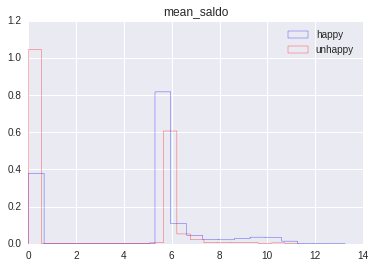

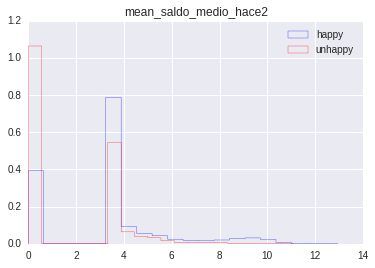

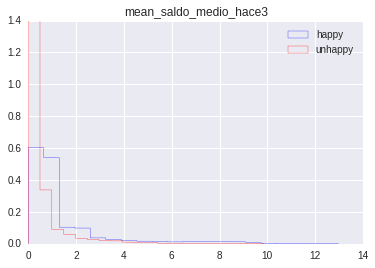

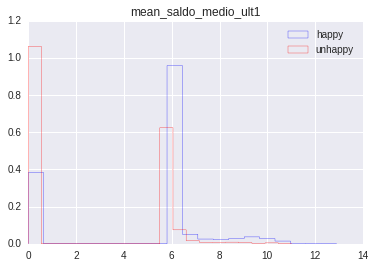

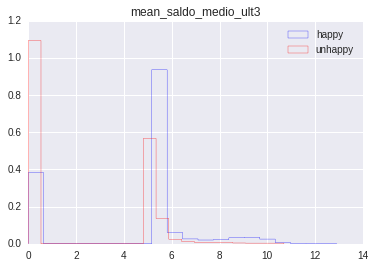

In [80]:
# Plot new_features Happy vs Unhappy
for name in new_features:
    plot_happy_vs_unhappy(name)

From the plots, we can expect these new features to have some ability to predict the target variable.

What we can get out of these plots is that unhappy persons tend to have lower mean balance, which makes sense.

In [ ]:
# Plot all the features Happy vs Unhappy
for name in happy.columns:
    plot_happy_vs_unhappy(name)

### Box plots

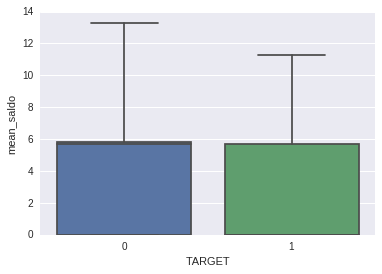

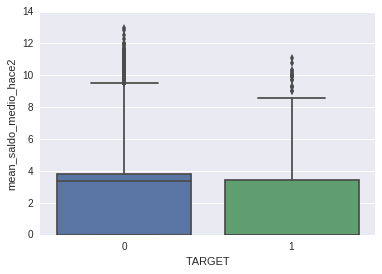

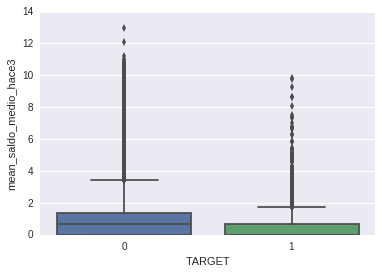

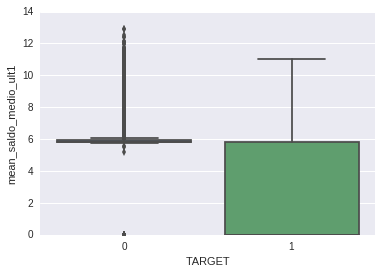

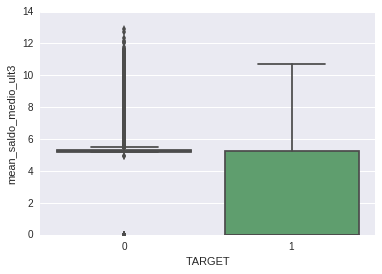

In [81]:
for name in new_features:
    _ = sns.boxplot(x=data['TARGET'], y=data[name])
    plt.show()

These box plots confirm that these new features can have predicting power.

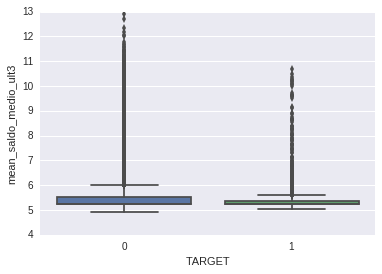

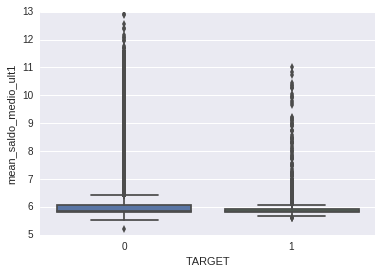

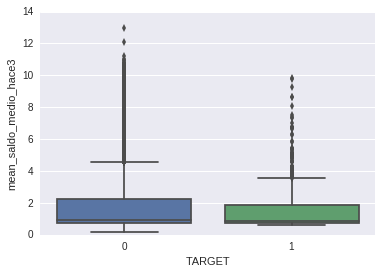

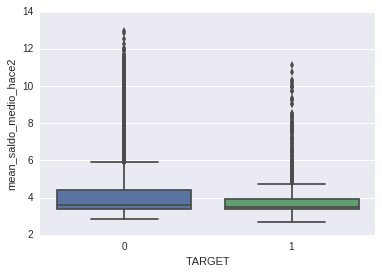

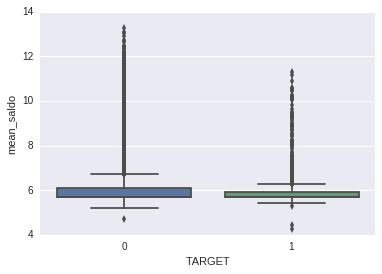

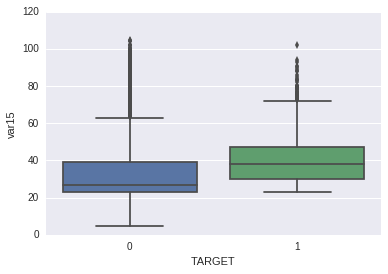

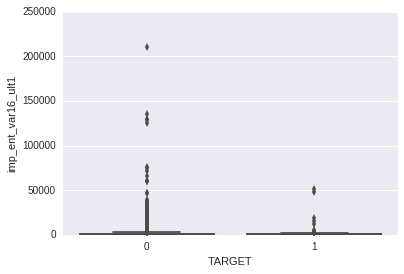

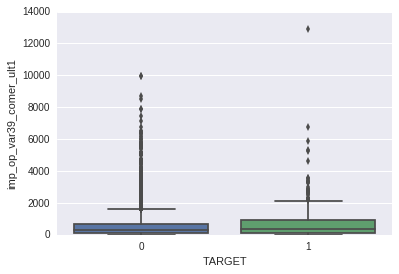

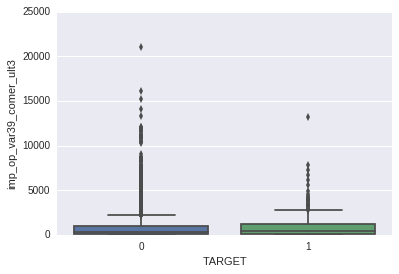

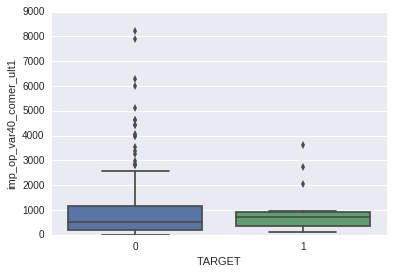

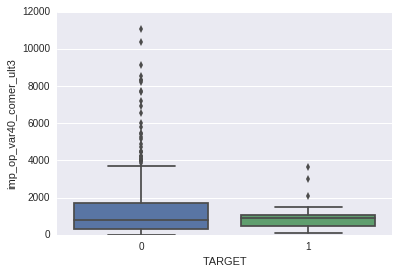

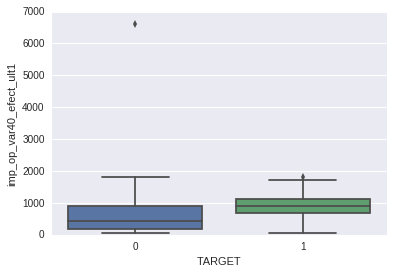

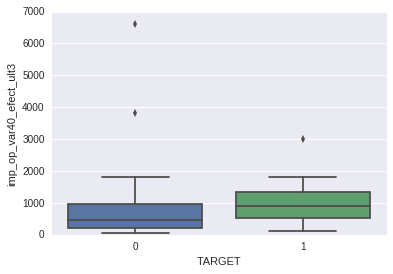

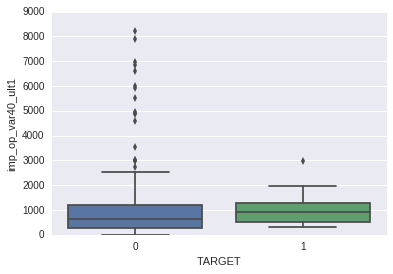

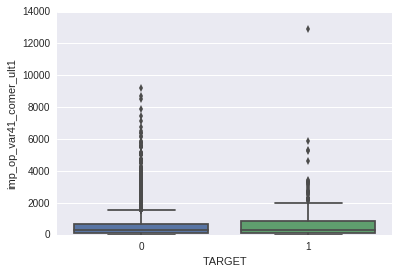

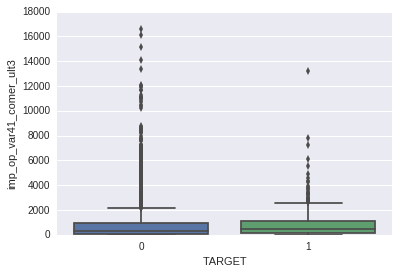

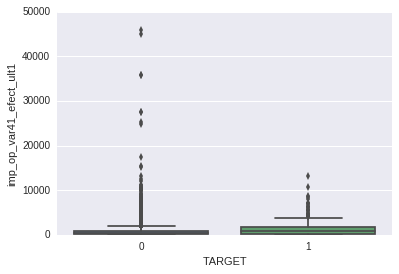

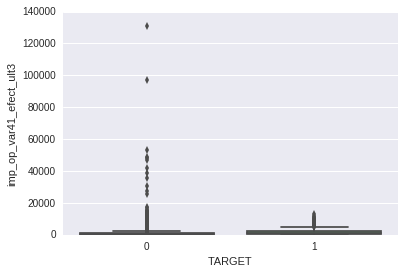

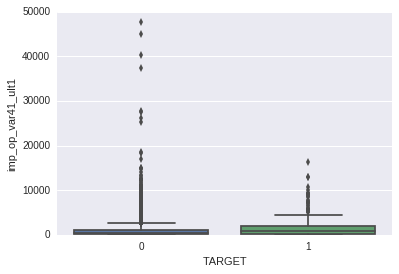

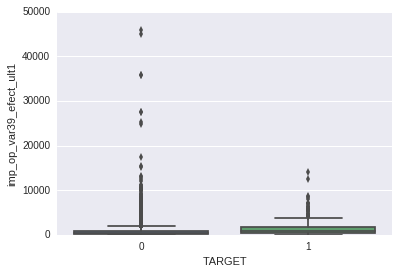

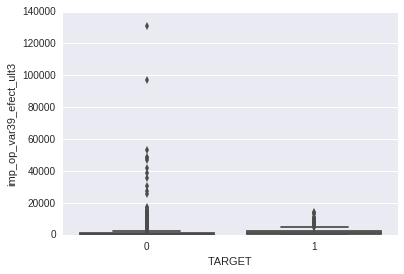

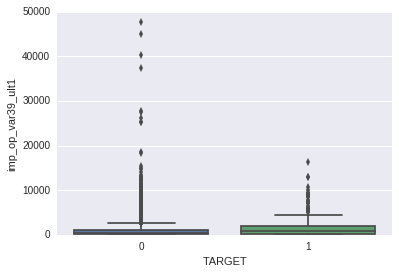

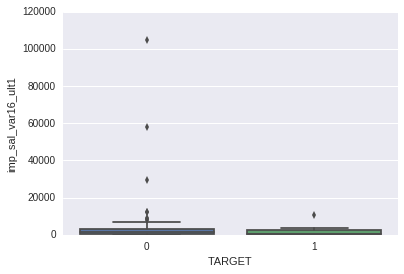

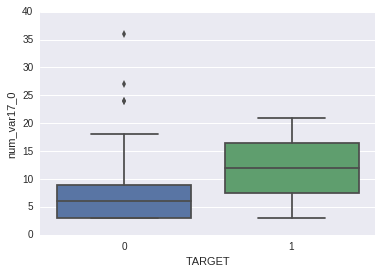

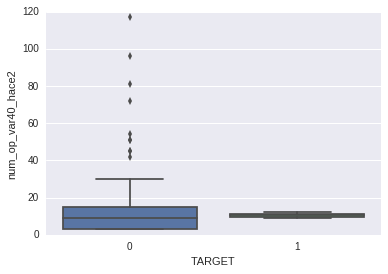

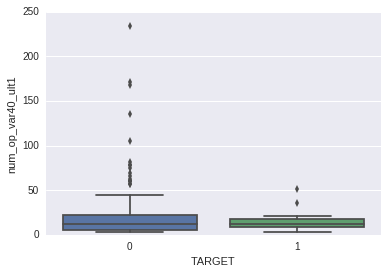

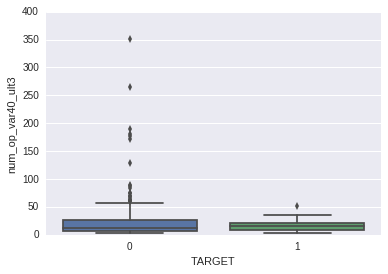

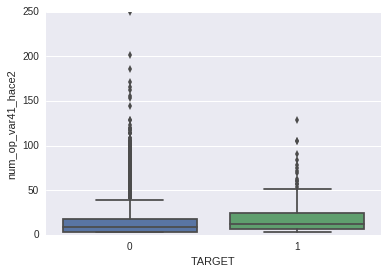

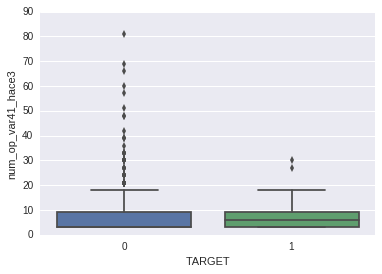

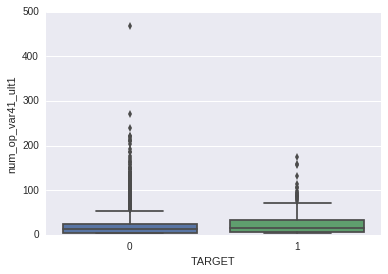

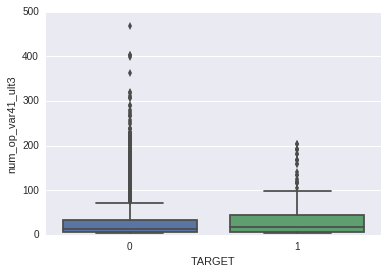

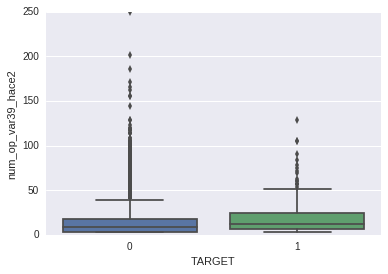

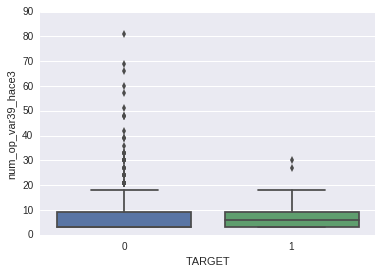

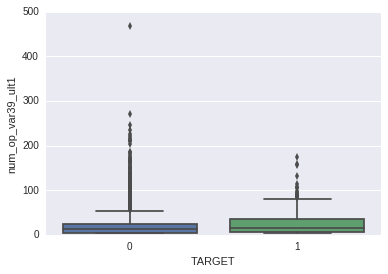

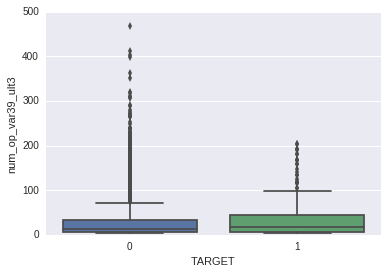

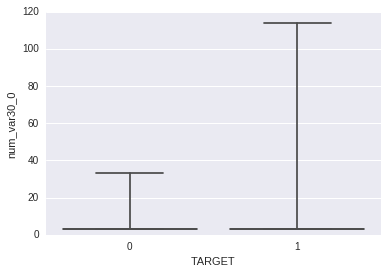

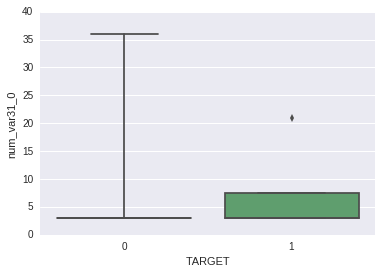

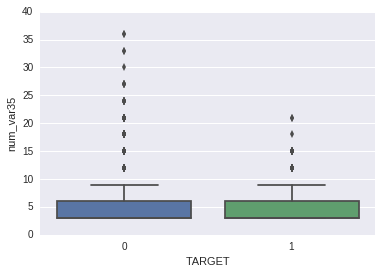

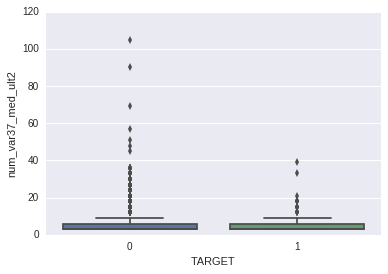

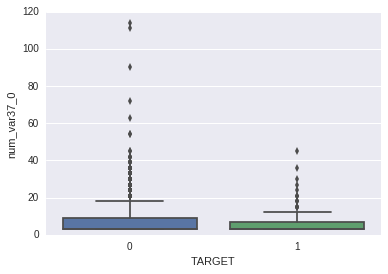

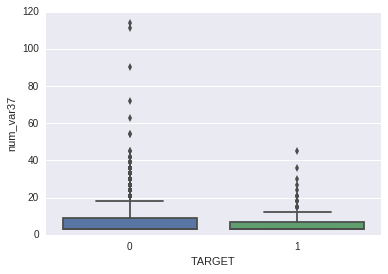

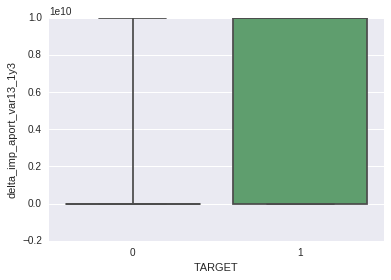

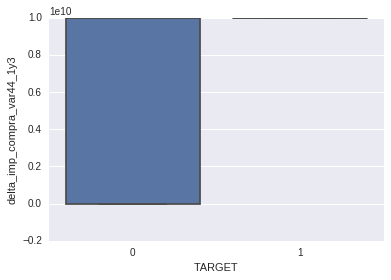

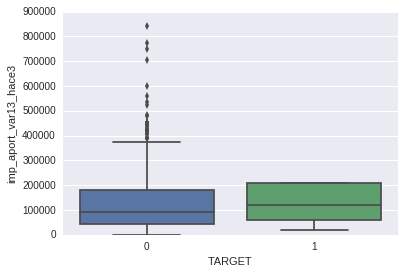

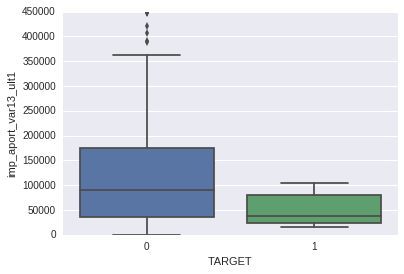

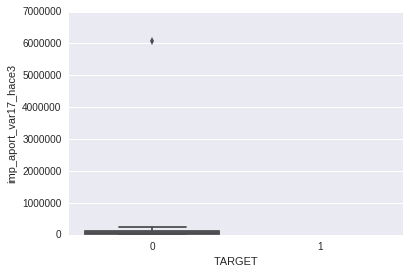

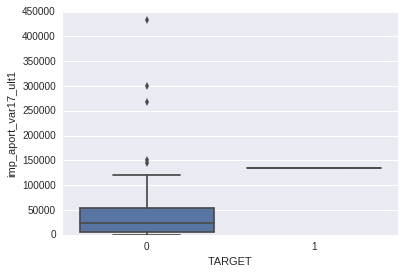

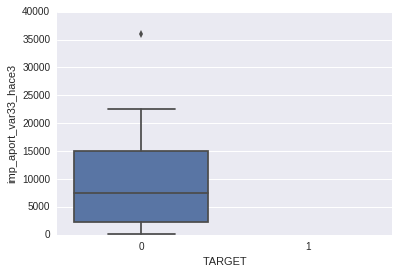

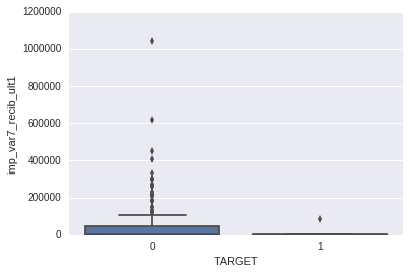

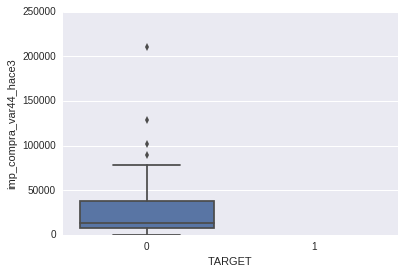

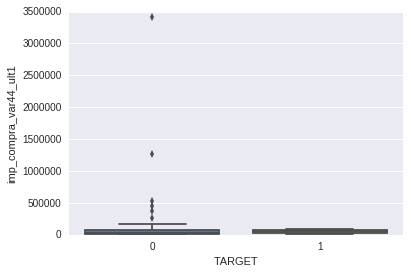

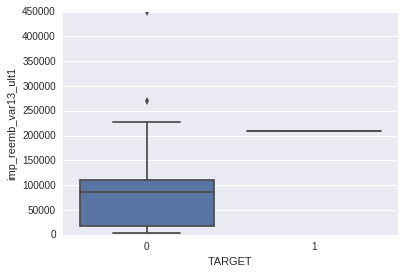

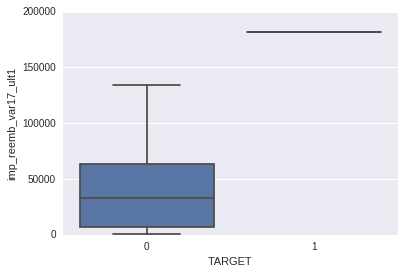

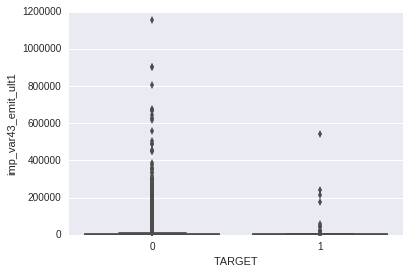

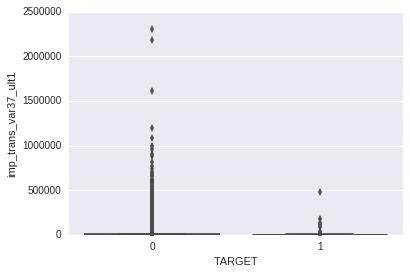

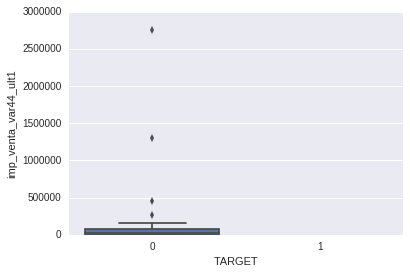

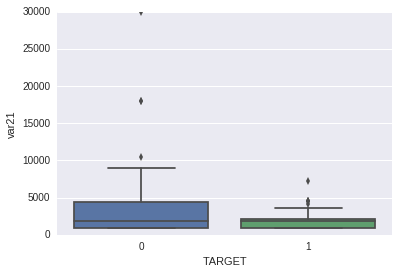

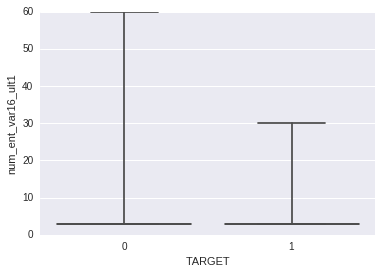

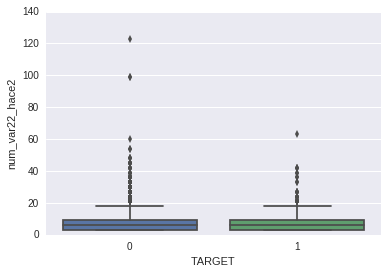

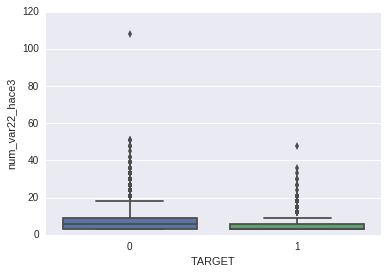

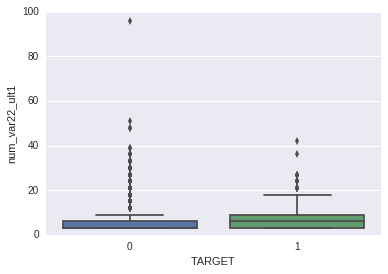

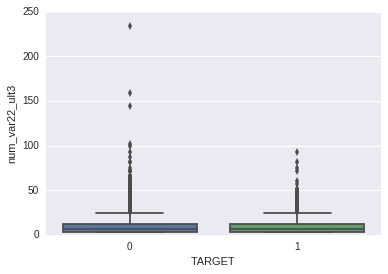

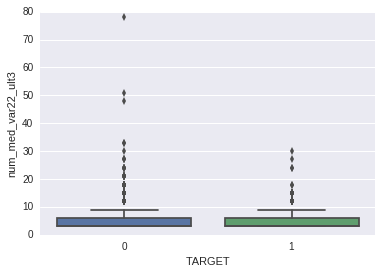

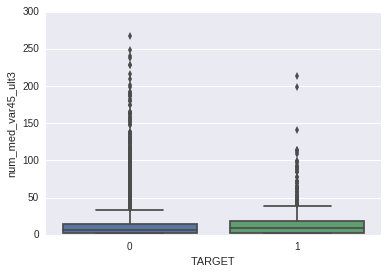

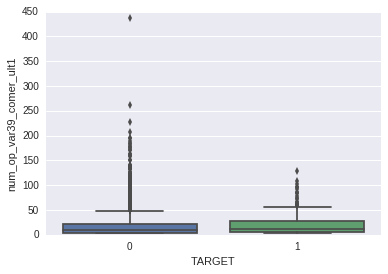

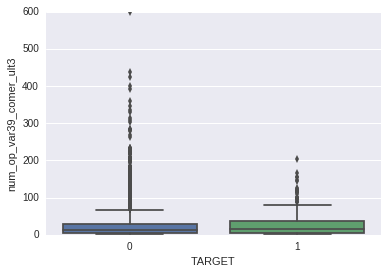

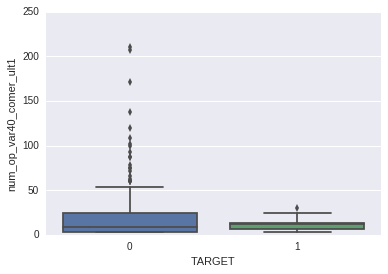

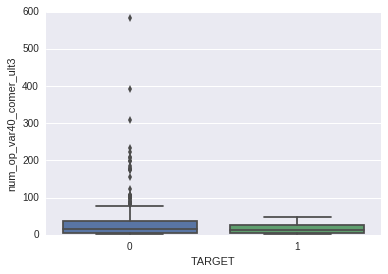

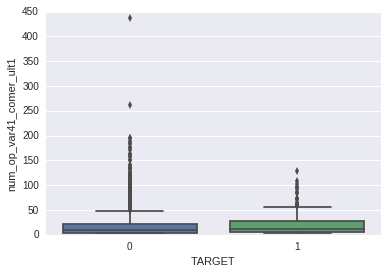

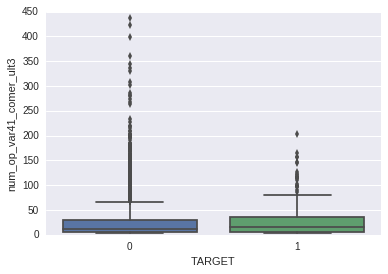

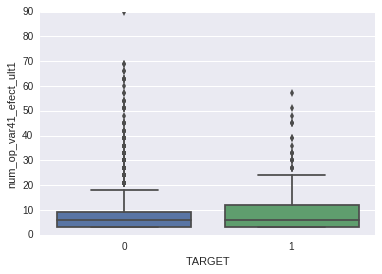

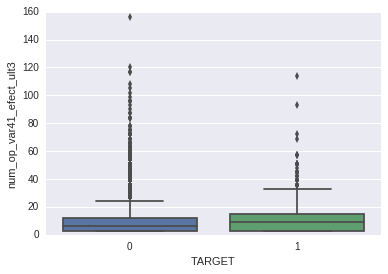

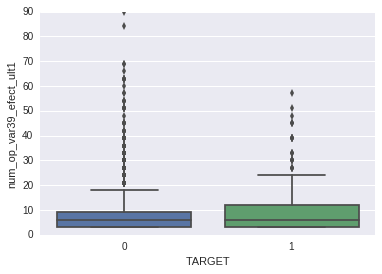

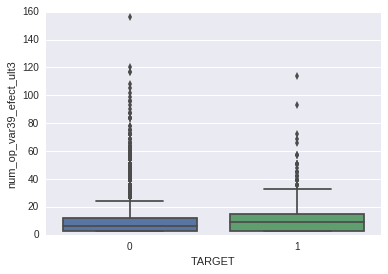

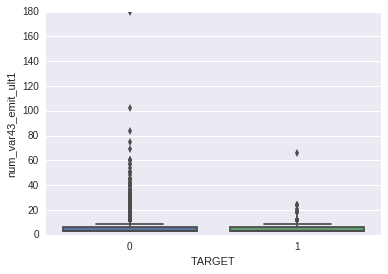

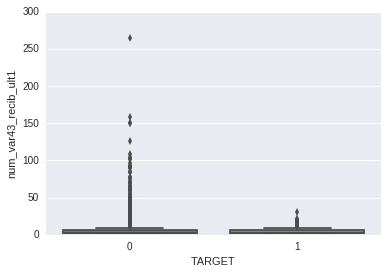

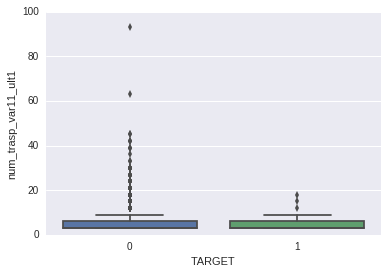

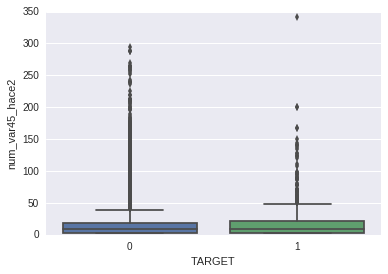

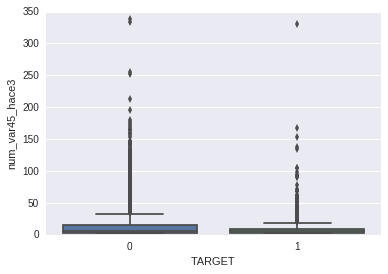

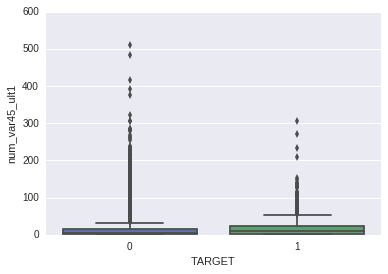

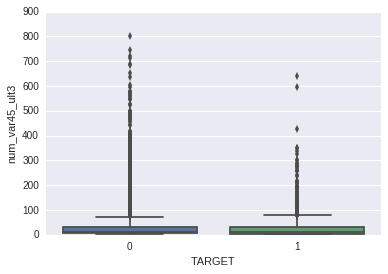

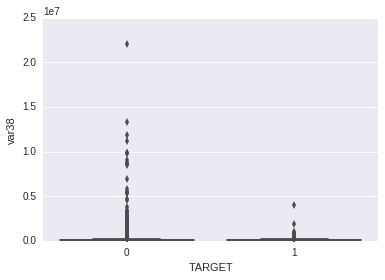

In [84]:
for name in data.columns[:-1]:
    if len(data[name].unique()) > 10:
        _ = boxplot(x=data['TARGET'], y=data[name][data[name] != 0])
        plt.show()

In [ ]:
unhappy['num_var5'].value_counts()

From looking at these histograms there are a couple of things we notice:

-A lot of the variables are hard-coded categorical with 1 and 0 options. (Of course, they are the ones starting with 'ind\_var{}' wich stands for the spanish 'indicador' which means indicator variable.

Some thoughts:

The real underlying variables are what it's named in the features as 'var{}', they probably indicate some financial product sold by Santander, the other features are are information about this underlyings. For example, 

In [ ]:
len(data.var3.unique())

## Categorization of variables

In [ ]:
array = []
for name in data.columns:
    array.append((name,len(data[name].unique())))

In [ ]:
df = pd.DataFrame(array)
df

In [ ]:
cat = df[df[1] == 2]
cat

In [ ]:
for name in cat[0]:
    if 'saldo' in name:
        print(name)

In [ ]:
data['saldo_medio_var29_hace3'].value_counts()

In [ ]:
for name in data.columns:
    if 'var29' in name:
        print(data[name].value_counts())

In [ ]:
categorical = []
for name in data.columns:
    if 'ind_' in name:
        categorical.append(name)
categorical

In [ ]:
len(categorical)

In [ ]:
for name in categorical:
    if 'op' not in name:
        print('{} possible values for variable {}.'.format(len(data[name].unique()),name))

In [ ]:
data['num_var45_ult3'].value_counts()

In [ ]:
for name in data.columns:
    if 'var45' in name:
        print(name)

In [ ]:
# Turn these variables into honest categorical variables
for name in categorical:
    data[name] = data[name].astype('category')

In [ ]:
delta = []
for name in data.columns:
    if 'delta' in name:
        delta.append(name)
delta

Note that among 'ind' and 'num' variables, there are some with the special keyword 'delta'.
Nonetheless, they are also categorical.

In [ ]:
for name in delta:
    if 'num' in name:
        print(data[name].value_counts())

# Logistic Classification with AIC model selection

In [4]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train = data.ix[:,:-1]

In [ ]:
Y_train = data.ix[:,'TARGET']

In [5]:
LogisticRegression?

In [6]:
lg = LogisticRegressionCV(cv = 3, class_weight='balanced')

In [ ]:
lg.fit(X_train, Y_train)

In [ ]:
lg.scores_

In [ ]:
Y_pred = lg.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_pred, Y_train)